In [1]:
import pandas as pd
import numpy as np
import jupyterlab_dash
import dash
import dash_html_components as html
import dash_core_components as dcc

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import re

In [3]:
real_data = pd.read_csv('Results/Real_Data.csv')
RGD = pd.read_csv('Results/RGD.csv')
RGU = pd.read_csv('Results/RGU.csv')
SF = pd.read_csv('Results/SF.csv')

In [48]:
phis = ['5', '10', '18', '20', '25', '50']
ylabs_map = {'S': 'Number of Nodes Influenced',
            'N': 'Proportion of Network Influenced',
            'P': 'Proportion of Network Influenced',
            'T': 'Average Time of Influenced'}
percentile_map = {
    0 : '0-5', 1 : '5-10', 2 : '10-15', 3 : '15-20', 4 : '0-10', 
    5 : '0-15', 6 : '0-20', 7 : 'Normal', 8 : '95-100'}
df_map = {
    'RGD':RGD,
    'RGU':RGU,
    'SF':SF
}

In [5]:
def get_graph(df, cols, y_lab):
    x = df.iloc[:,0]
    fig = go.Figure()

    for col in cols:
        lab = col.split('_')[1]
        fig.add_trace(go.Scatter(x=x, y=df[col], name=lab))
        
    fig.update_layout(xaxis_title='Average Degree',
                     yaxis_title=y_lab)
    return fig

def get_cols(df, phi, version='S'):
    return [x for x in df.columns if x.endswith(version+'_'+phi)]

In [6]:
def get_graph_real(df, name='facebook', version='S'):
    x = df.iloc[:,0]
    y = df['{}_{}'.format(name, version)]
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y))
    fig.update_layout(xaxis_title='Threshold Value',
                     yaxis_title=ylabs_map[version],
                     title_text=name)
    return fig

In [53]:
cols

['RGU_0-5_N_18',
 'RGU_5-10_N_18',
 'RGU_10-15_N_18',
 'RGU_15-20_N_18',
 'RGU_0-10_N_18',
 'RGU_0-15_N_18',
 'RGU_0-20_N_18',
 'RGU_Normal_N_18',
 'RGU_95-100_N_18']

In [56]:
def get_multiplier_graph(df, phi):
    x = df.iloc[:,0]
    cols = get_cols(df, phi, version='N')
    
    y_05_n = [i/j for i,j in zip(df[cols[0]], df[cols[7]])]
    y_010_n = [i/j for i,j in zip(df[cols[4]], df[cols[7]])]
    y_1015_n = [i/j for i,j in zip(df[cols[2]], df[cols[7]])]
    y_1520_n = [i/j for i,j in zip(df[cols[3]], df[cols[7]])]
    y_020_n = [i/j for i,j in zip(df[cols[6]], df[cols[7]])]
    
    y_n_95100 = [i/j for i,j in zip(df[cols[7]], df[cols[8]])]

    y_05_95100 = [i/j for i,j in zip(df[cols[0]], df[cols[8]])]
    y_010_95100 = [i/j for i,j in zip(df[cols[4]], df[cols[8]])]
    y_020_95100 = [i/j for i,j in zip(df[cols[6]], df[cols[8]])]
    y_1015_95100 = [i/j for i,j in zip(df[cols[2]], df[cols[8]])]
    y_1520_95100 = [i/j for i,j in zip(df[cols[3]], df[cols[8]])]
    
    y_05_510 = [i/j for i,j in zip(df[cols[0]], df[cols[1]])]
    y_05_1015 = [i/j for i,j in zip(df[cols[0]], df[cols[2]])]
    y_05_1520 = [i/j for i,j in zip(df[cols[0]], df[cols[3]])]

    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=[1 for _ in x ], name='Unity'))
    fig.add_trace(go.Scatter(x=x, y=y_05_n, name='0-5 vs. Normal'))
    fig.add_trace(go.Scatter(x=x, y=y_010_n, name='0-10 vs. Normal'))
    fig.add_trace(go.Scatter(x=x, y=y_020_n, name='0-20 vs. Normal'))
    fig.add_trace(go.Scatter(x=x, y=y_1015_n, name='10-15 vs. Normal'))
    fig.add_trace(go.Scatter(x=x, y=y_1520_n, name='15-20 vs. Normal'))
    
    fig.add_trace(go.Scatter(x=x, y=y_n_95100, name='Normal vs. 95-100'))
    
    fig.add_trace(go.Scatter(x=x, y=y_05_95100, name='0-5 vs. 95-100'))
    fig.add_trace(go.Scatter(x=x, y=y_010_95100, name='0-10 vs. 95-100'))
    fig.add_trace(go.Scatter(x=x, y=y_020_95100, name='0-20 vs. 95-100'))
    fig.add_trace(go.Scatter(x=x, y=y_1015_95100, name='10-15 vs. 95-100'))
    fig.add_trace(go.Scatter(x=x, y=y_1520_95100, name='15-20 vs. 95-100'))
    
    fig.add_trace(go.Scatter(x=x, y=y_05_510, name='0-5 vs. 5-10'))
    fig.add_trace(go.Scatter(x=x, y=y_05_1015, name='0-5 vs. 10-15'))
    fig.add_trace(go.Scatter(x=x, y=y_05_1520, name='0-20 vs. 15-20'))    
    
    fig.update_layout(xaxis_title='Average Degree',
                     yaxis_title='Multiplier',
                     title_text='Relative Impact of Influence Across Node Degrees')
    
    return fig

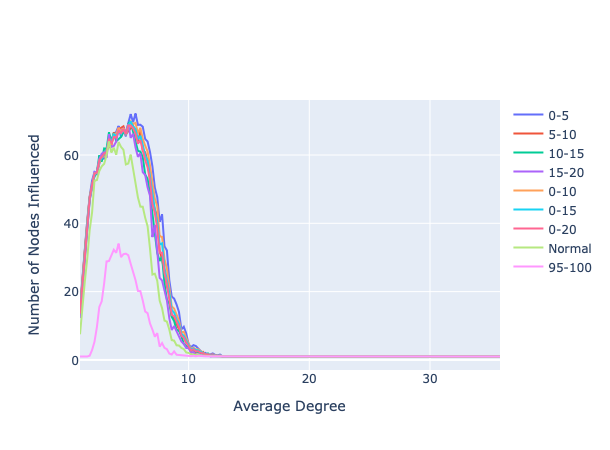

In [38]:
get_graph(RGU, get_cols(RGU, '18'), ylabs_map['S'])

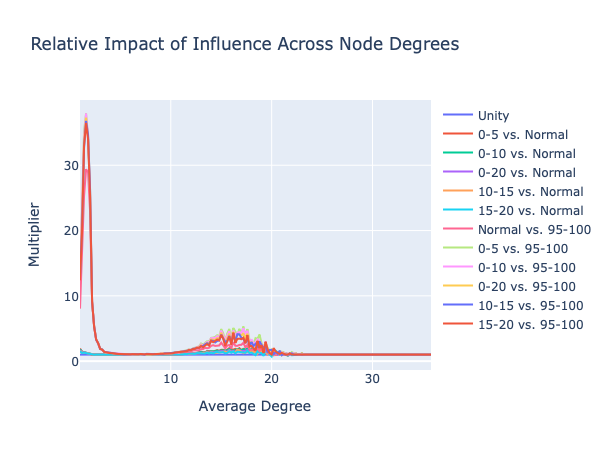

In [46]:
get_multiplier_graph(RGU, '10')

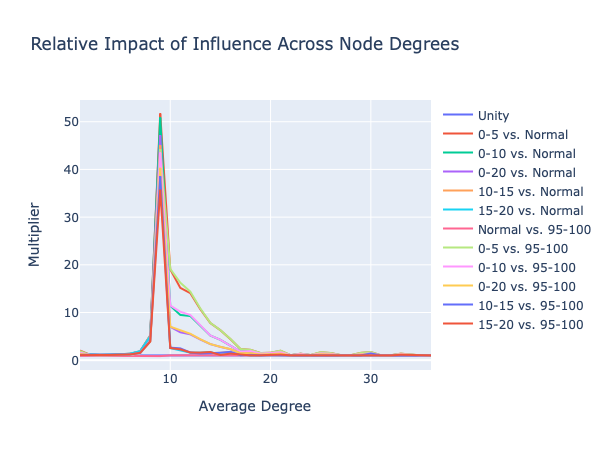

In [47]:
get_multiplier_graph(SF,'10')

In [57]:
viewer = jupyterlab_dash.AppViewer()

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1('Influentials Dashboard'),
    html.Div([
        html.H2('Poisson Random Graph (Undirected)'),
        dcc.Dropdown(
            id='type_RGU',
            options=[
                {'label': 'Number of Nodes Influenced', 'value': 'S'},
                {'label': 'Proportion of Network Influenced', 'value': 'N'},
                {'label': 'Average Time of Influenced', 'value': 'T'}
            ],
            value='S'
        ),
        dcc.Graph(
            id='line_graph_RGU'
        ),
        dcc.Slider(
            id='line_slider_RGU',
            min=0,
            max=len(phis)-1,
            marks={i: '{}%'.format(phis[i]) for i in range(len(phis))},
            value=2,
        )]),
    html.Div([
        html.H2('Poisson Random Graph (Directed)'),
        dcc.Dropdown(
            id='type_RGD',
            options=[
                {'label': 'Number of Nodes Influenced', 'value': 'S'},
                {'label': 'Proportion of Network Influenced', 'value': 'N'},
                {'label': 'Average Time of Influenced', 'value': 'T'}
            ],
            value='S'
        ),
        dcc.Graph(
            id='line_graph_RGD'
        ),
        dcc.Slider(
            id='line_slider_RGD',
            min=0,
            max=len(phis)-1,
            marks={i: '{}%'.format(phis[i]) for i in range(len(phis))},
            value=2,
        )]),
    html.Div([
        html.H2('Scale Free Network'),
        dcc.Dropdown(
            id='type_SF',
            options=[
                {'label': 'Number of Nodes Influenced', 'value': 'S'},
                {'label': 'Proportion of Network Influenced', 'value': 'N'},
                {'label': 'Average Time of Influenced', 'value': 'T'}
            ],
            value='S'
        ),
        dcc.Graph(
            id='line_graph_SF'
        ),
        dcc.Slider(
            id='line_slider_SF',
            min=0,
            max=len(phis)-1,
            marks={i: '{}%'.format(phis[i]) for i in range(len(phis))},
            value=2,
        )]),
    html.Div([
        html.H2('Influentials in Real Social Networks'),
        dcc.Dropdown(
            id='type_real',
            options=[
                {'label': 'Number of Nodes Influenced', 'value': 'S'},
                {'label': 'Proportion of Network Influenced', 'value': 'P'},
                {'label': 'Average Time of Influenced', 'value': 'T'}
            ],
            value='S'
        ),
        dcc.Graph(
            id='line_graph_real'
        ),
        dcc.RadioItems(
            id='data_name',
            options=[
                {'label': 'Facebook', 'value': 'facebook'},
                {'label': 'Advogato', 'value': 'advogato'}
            ],
            value='facebook',
            labelStyle={'display': 'inline-block', 'margin':'5px'}
        )]),
    
    html.Div([
        html.H2('Relative Impact of Influence Across Node Degrees'),
        dcc.Dropdown(
            id='multiplier_type',
            options=[
                {'label': 'Poisson Random Graph (Undirected)', 'value': 'RGU'},
                {'label': 'Poisson Random Graph (Directed)', 'value': 'RGD'},
                {'label': 'Scale Free Network', 'value': 'SF'}
            ],
            value='RGU'),
        dcc.Graph(id='multiplier_graph'),
        dcc.Slider(
            id='line_slider_multiplier',
            min=0,
            max=len(phis)-1,
            marks={i: '{}%'.format(phis[i]) for i in range(len(phis))},
            value=2,
        )])
])

@app.callback(
    dash.dependencies.Output('line_graph_RGU', 'figure'),
    [dash.dependencies.Input('type_RGU', 'value'), dash.dependencies.Input('line_slider_RGU', 'value')])
def update_graph_RGU(version, phi):
    cols = get_cols(RGU, phis[phi], version=version)
    fig = get_graph(RGU, cols, ylabs_map[version])
    return fig

@app.callback(
    dash.dependencies.Output('line_graph_RGD', 'figure'),
    [dash.dependencies.Input('type_RGD', 'value'), dash.dependencies.Input('line_slider_RGD', 'value')])
def update_graph_RGD(version, phi):
    cols = get_cols(RGD, phis[phi], version=version)
    fig = get_graph(RGD, cols, ylabs_map[version])
    return fig

@app.callback(
    dash.dependencies.Output('line_graph_SF', 'figure'),
    [dash.dependencies.Input('type_SF', 'value'), dash.dependencies.Input('line_slider_SF', 'value')])
def update_graph_SF(version, phi):
    cols = get_cols(SF, phis[phi], version=version)
    fig = get_graph(SF, cols, ylabs_map[version])
    return fig

@app.callback(
    dash.dependencies.Output('line_graph_real', 'figure'),
    [dash.dependencies.Input('data_name', 'value'), dash.dependencies.Input('type_real', 'value')])
def update_graph_real(name, version):
    fig = get_graph_real(real_data, name=name, version=version)
    return fig

@app.callback(
    dash.dependencies.Output('multiplier_graph', 'figure'),
    [dash.dependencies.Input('multiplier_type', 'value'), dash.dependencies.Input('line_slider_multiplier', 'value')])
def update_graph_real(graph_type, phi):
    fig = get_multiplier_graph(df_map[graph_type],phis[phi])
    return fig



viewer.show(app)